In [48]:
import sys

sys.path.append("..")

In [49]:
from experiments.draw import plot_results
from experiments.colors import get_vibrant_colors
from experiments.utils import load_experiment
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
plt.rcParams["figure.dpi"] = 600

In [52]:
NAME = "expr20240602094304"


SUBFOLDER = "general"


model, data, _ = load_experiment(NAME, SUBFOLDER)


plt.rcParams["figure.dpi"] = 600


plt.rcParams["figure.figsize"] = (8, 8)

INFO:nrc.fuzzy_c_means:[FuzzyCMeans] Converged after 6 iterations. Stopping early.
INFO:nrc.noisy_rings_clustering:[NoisyRingsClustering] Converged partly after 21 iterations. Recomputing noise mask and continuing. Total noise samples are 0.0
INFO:nrc.noisy_rings_clustering:[NoisyRingsClustering] Converged after 22 iterations. Stopping early.
INFO:nrc.noisy_rings_clustering:Total noise samples: 0


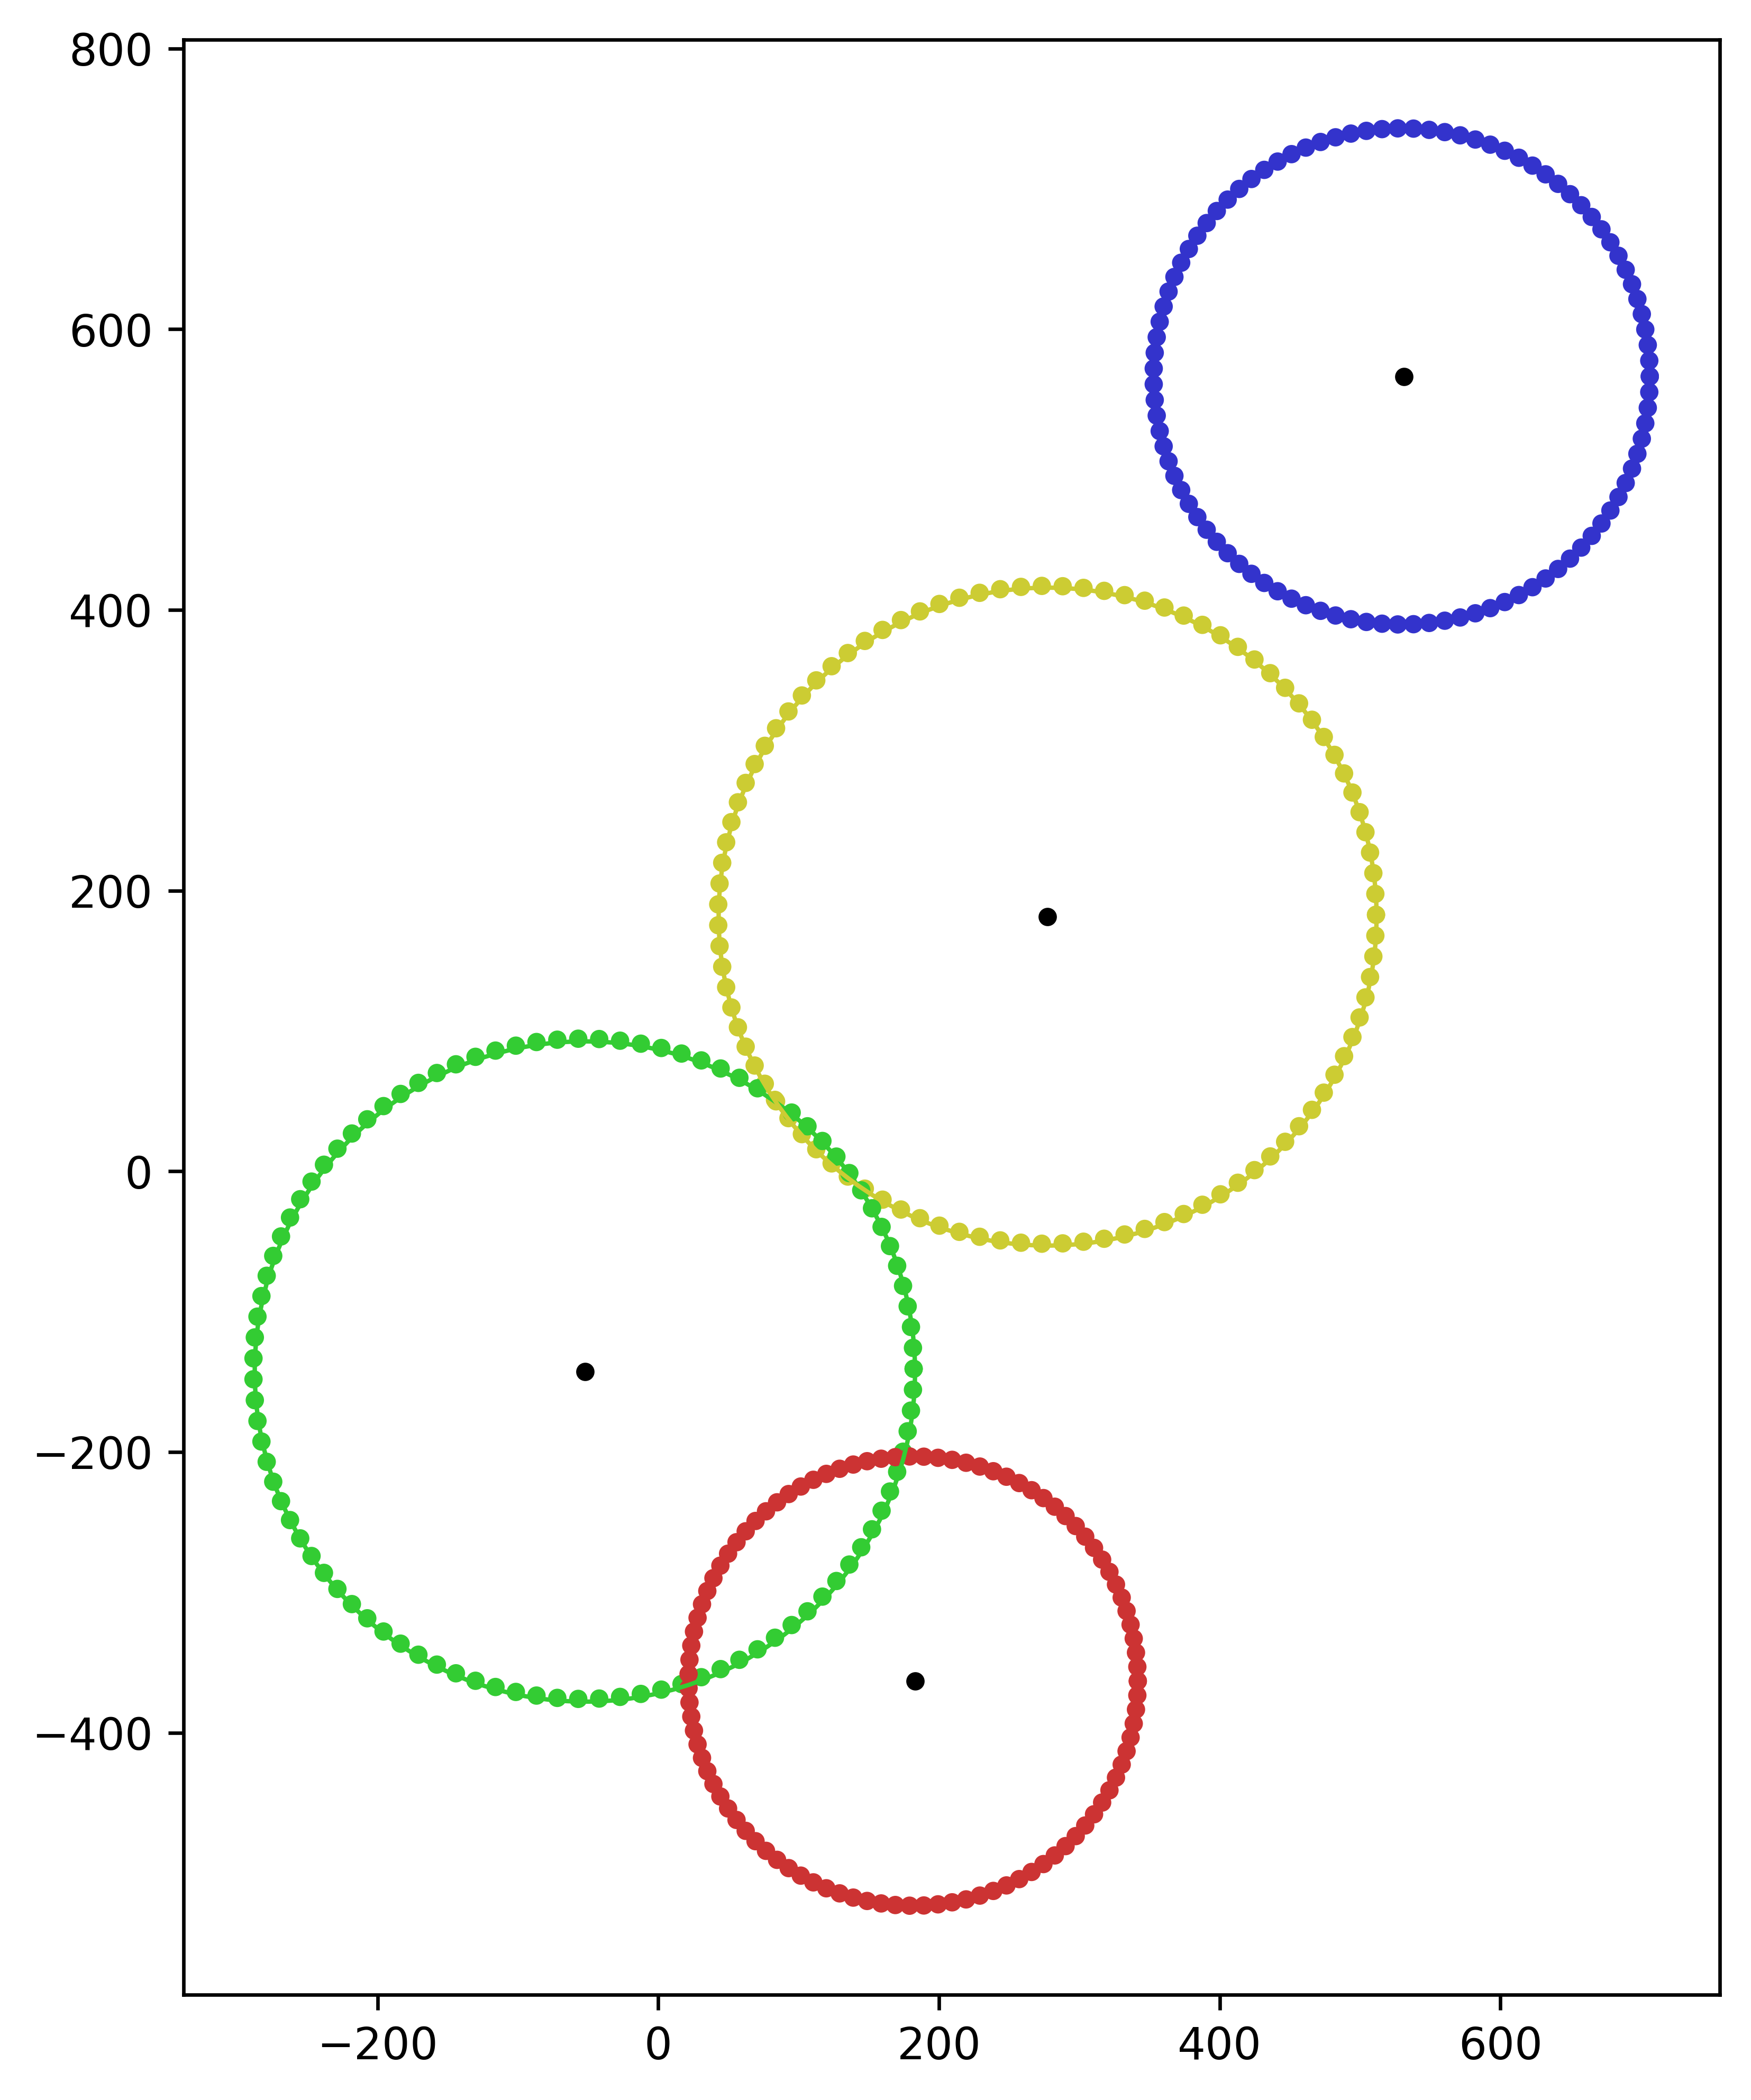

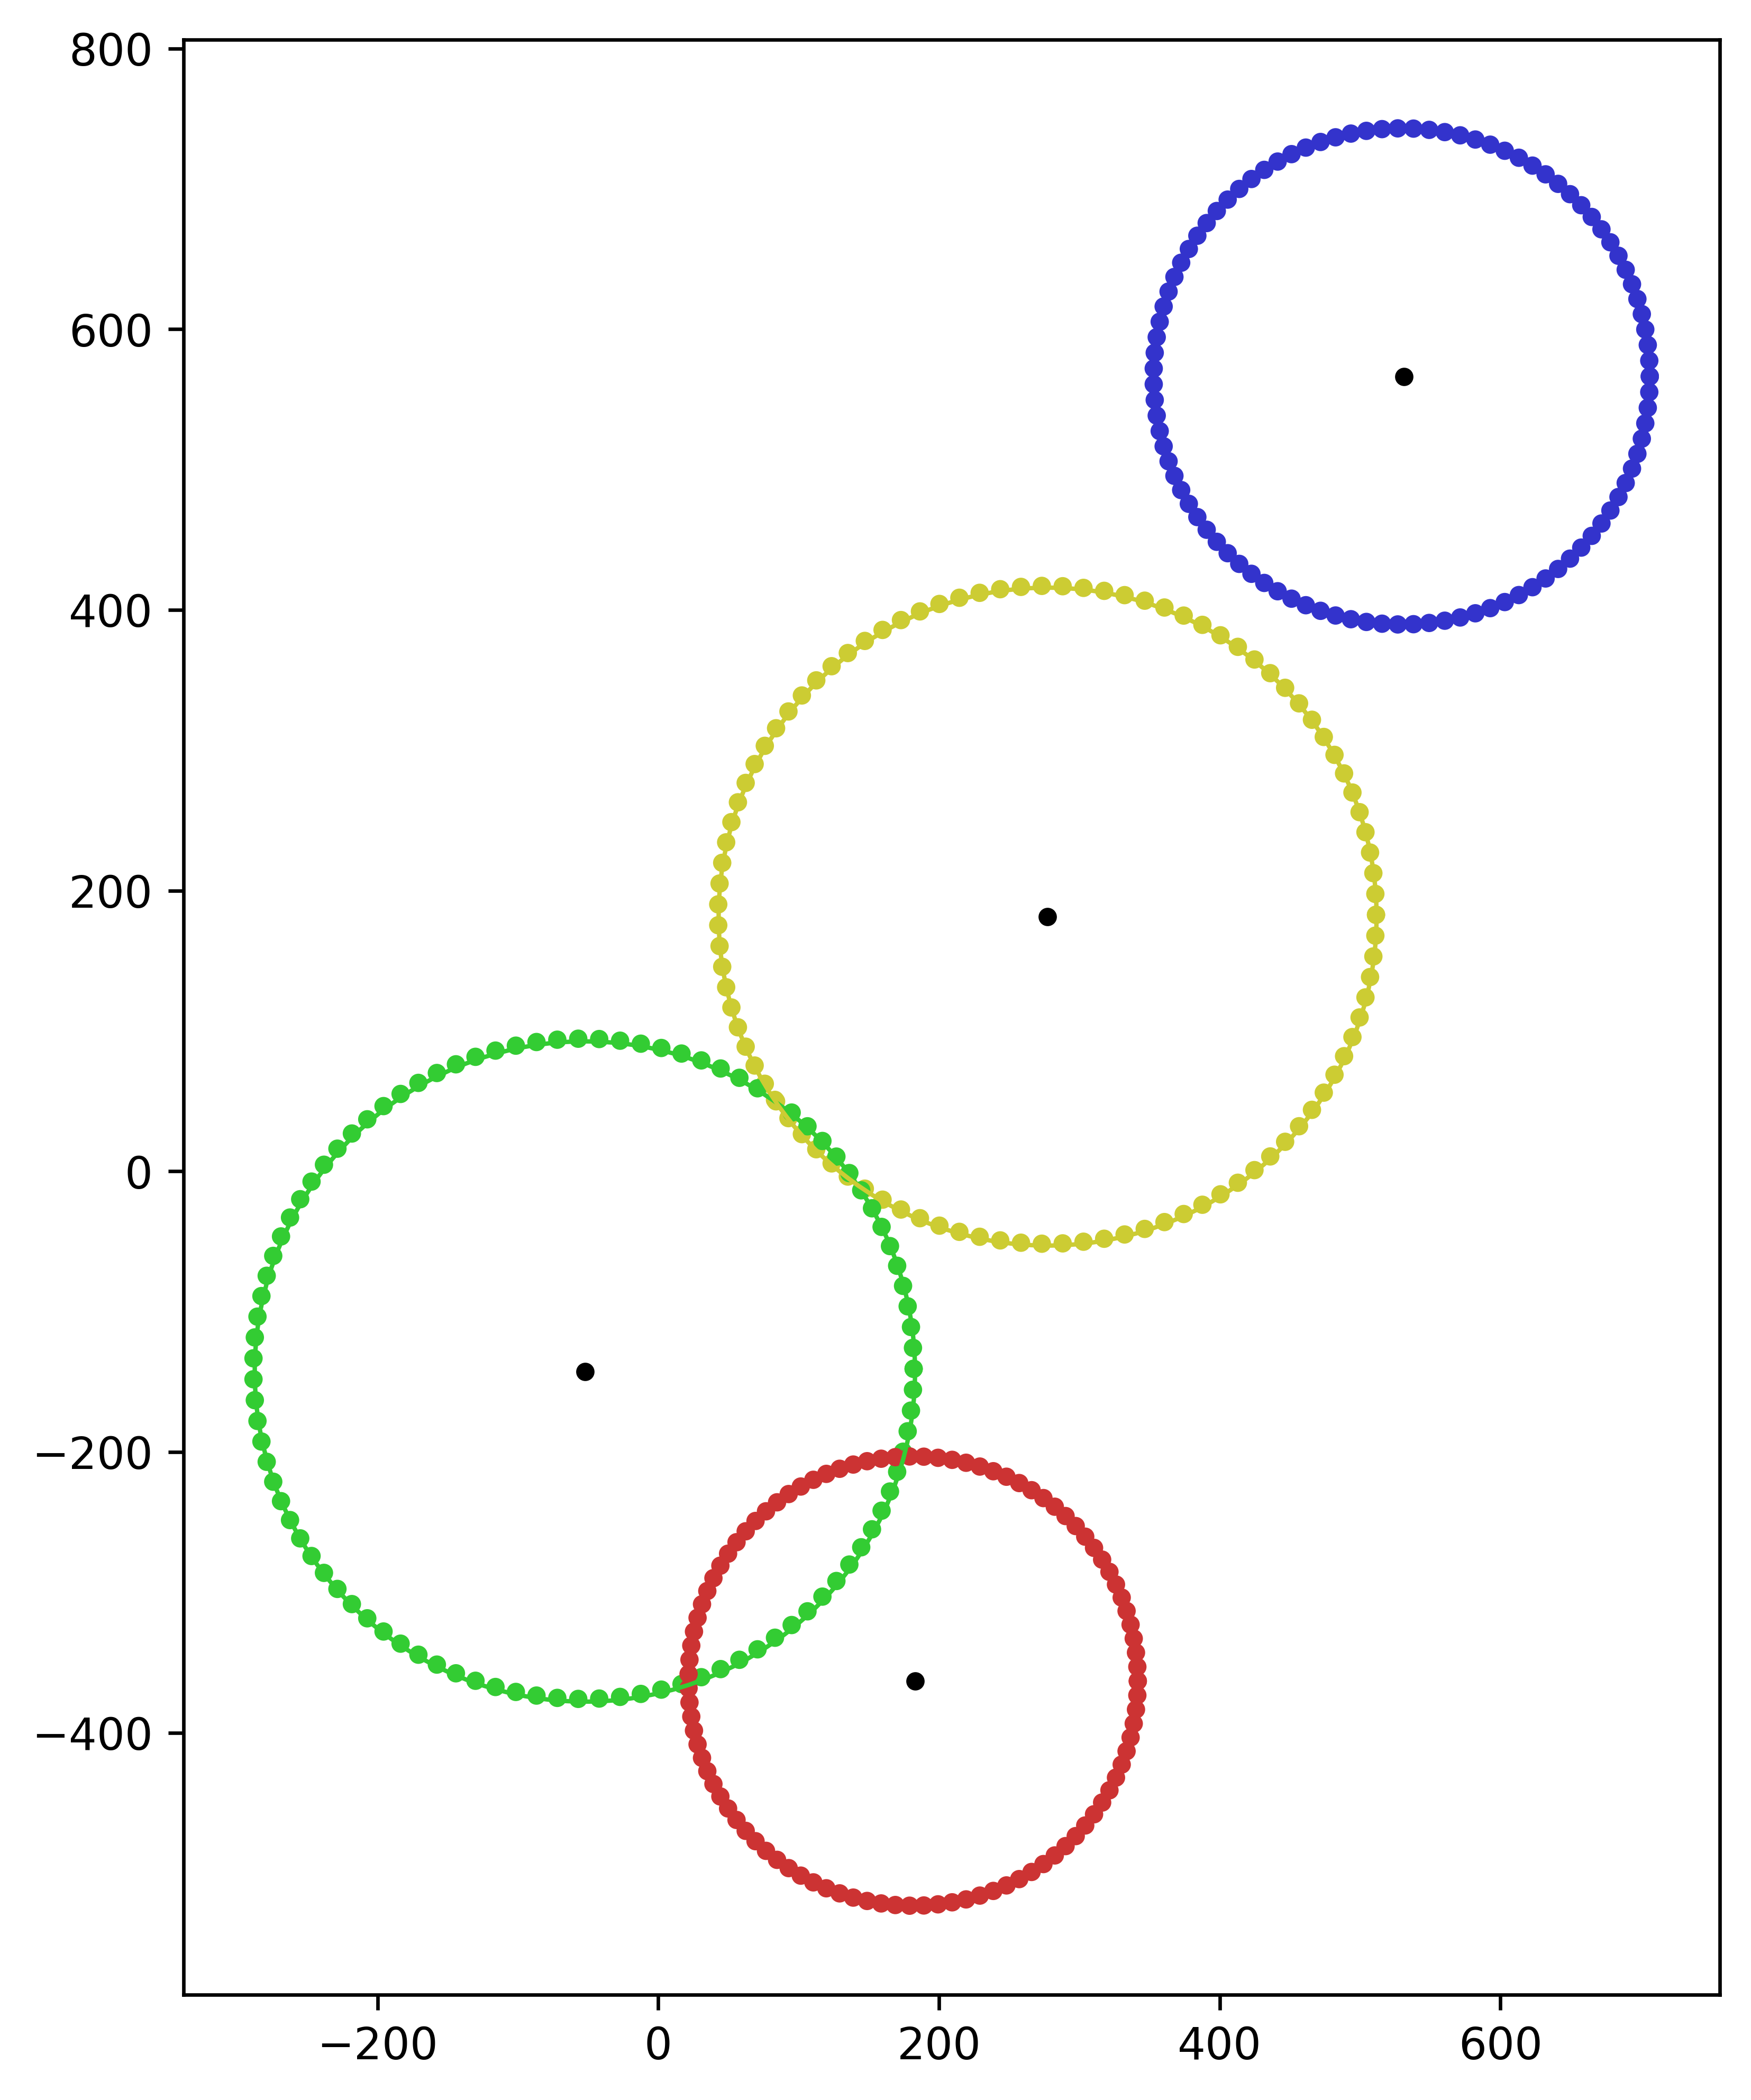

In [54]:
model.fit(data)

# Get the clustering results
# Get the clustering results
radii, centers, memberships = model.get_labels()
n_rings = model.n_rings
# Define distinct vibrant colors for each ring
vibrant_colors = get_vibrant_colors(n_rings)
# Ensure we have as many vibrant colors as we have rings
if len(vibrant_colors) < n_rings:
    raise ValueError(
        "Not enough distinct vibrant colors for the number of rings")
fig = plot_results(data, radii, centers, memberships, vibrant_colors)
fig

In [47]:
import matplotlib


def save_plot_to_tikz(name):
    old_backend = matplotlib.get_backend()
    matplotlib.use("pgf")
    fig.savefig(f"{name}.pgf")
    matplotlib.use(old_backend)


save_plot_to_tikz(NAME)